In [1]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('train.csv')

In [2]:
dataset.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
dataset.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [4]:
sentiment = dataset['comment_text'].values
y_list = ["toxic","severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = dataset[y_list].values
sentiment

array(["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
       "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
       "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
       ...,
       'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.',
       'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.',
       '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of communit

In [5]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(sentiment))

In [6]:
from keras.preprocessing import text, sequence

seq = tokenizer.texts_to_sequences(sentiment)
pad = sequence.pad_sequences(seq, maxlen=100)

In [7]:
test = pd.read_csv('test.csv')
test = test['comment_text'].values
test_seq = tokenizer.texts_to_sequences(test)
test_pad = sequence.pad_sequences(test_seq, maxlen=100)

In [8]:
def plot_history(history):
	  # plot loss
    plt.title('Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='red', label='test')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
    
    # plot accuracy
    plt.title('Accuracy')
    plt.plot(history.history['categorical_accuracy'], color='blue', label='train')
    plt.plot(history.history['val_categorical_accuracy'], color='red', label='test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

In [14]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers


def model_add():
    inputs = Input(shape=(100, ))
    x = Embedding(20000, 128)(inputs)
    x = Bidirectional(LSTM(50))(x)
    x = Dropout(0.1)(x)
    x = Dense(50, activation="relu")(x)
    x = Dropout(0.1)(x)
    outputs = Dense(6, activation="sigmoid")(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='mean_squared_error',
                  optimizer='adam',
                  metrics=['categorical_accuracy'])
    return model
model = model_add()
print(model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100)               71600     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 306 

Epoch 1/20
4488/4488 [==============================] - 164s 36ms/step - loss: 0.0089 - categorical_accuracy: 0.9660 - val_loss: 0.0147 - val_categorical_accuracy: 0.9799
Epoch 2/20
4488/4488 [==============================] - 162s 36ms/step - loss: 0.0078 - categorical_accuracy: 0.8802 - val_loss: 0.0155 - val_categorical_accuracy: 0.9697
Epoch 3/20
4488/4488 [==============================] - 163s 36ms/step - loss: 0.0070 - categorical_accuracy: 0.7811 - val_loss: 0.0161 - val_categorical_accuracy: 0.8839
Epoch 4/20
4488/4488 [==============================] - 163s 36ms/step - loss: 0.0063 - categorical_accuracy: 0.6830 - val_loss: 0.0168 - val_categorical_accuracy: 0.6792
Epoch 5/20
4488/4488 [==============================] - 164s 36ms/step - loss: 0.0056 - categorical_accuracy: 0.6610 - val_loss: 0.0170 - val_categorical_accuracy: 0.8514
Epoch 6/20
4488/4488 [==============================] - 164s 37ms/step - loss: 0.0051 - categorical_accuracy: 0.7034 - val_loss: 0.0174 - val_cat

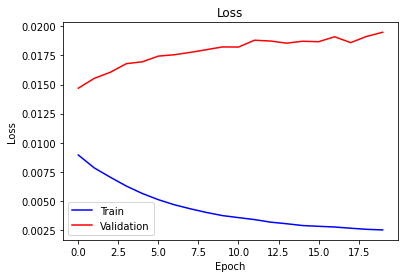

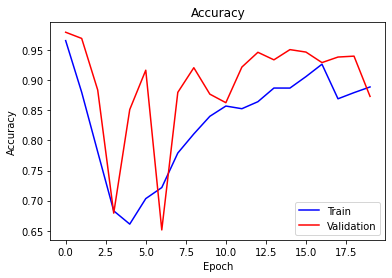

In [18]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early = EarlyStopping(monitor="val_loss", mode="min", patience=20)
model_his = model.fit(pad, y, batch_size=32, epochs=20, validation_split=0.1, callbacks=early)
 
plot_history(model_his)

In [19]:
 y_test = model.predict([test_pad], batch_size=1024, verbose=1)
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission[y_list] = y_test
sample_submission.to_csv('submission.csv', index=False)

150/150 [==============================] - 3s 21ms/step
